# Calories Burnt prediction

### Importing the Dependencies

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

## Loading the Data

In [13]:
attributes = pd.read_csv("exercise.csv")
attributes.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [14]:
labels = pd.read_csv("calories.csv")
labels.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [16]:
# Combine attributes with labels in one dataframe
attributes["Calories"] = labels["Calories"]
data = attributes.copy()
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


## Data Exploration

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [43]:
print(f"Num of rows: {data.shape[0]}")
print(f"Num of columns: {data.shape[1]}")

Num of rows: 15000
Num of columns: 9


In [46]:
# Check for missing values
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

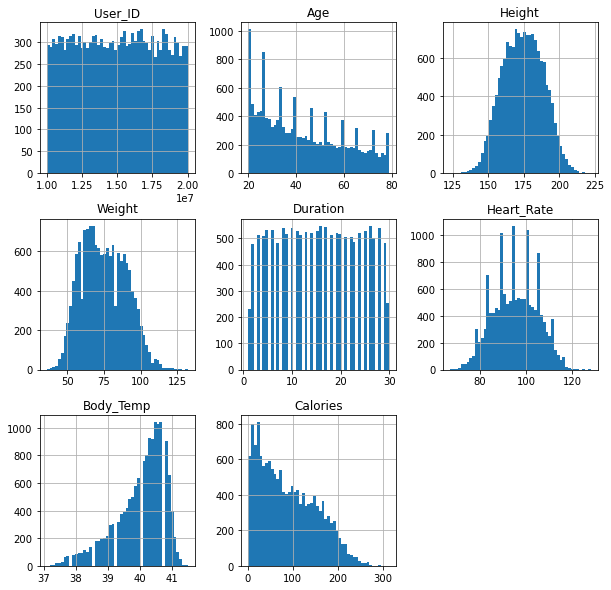

In [18]:
data.hist(bins=50, figsize=(10,10))
plt.show()

In [60]:
data_minus_userid_age = data.iloc[:,2:]

In [61]:
data_minus_userid_age.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [64]:
# view mean of attributs by gender

data.iloc[:,1:].groupby("Gender").mean()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Gender,,,,,,,
0,42.735469,164.405931,63.274460,15.502185,95.408579,40.019833,88.153052
1,42.844904,184.667517,86.825702,15.559420,95.630052,40.031153,90.945750


(9.5, -0.5)

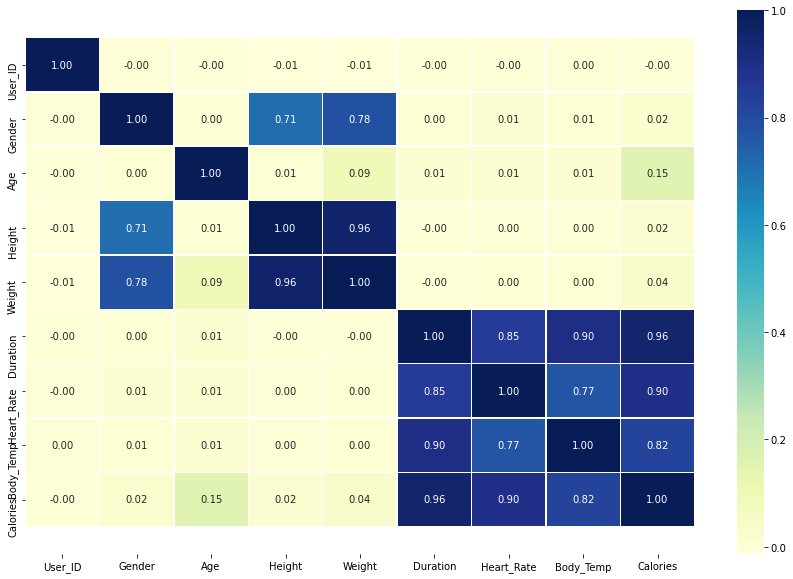

In [87]:
corr_matrix = data.corr()

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [89]:
corr_matrix["Calories"].sort_values(ascending= False)


Calories      1.000000
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Age           0.154395
Weight        0.035481
Gender        0.022357
Height        0.017537
User_ID      -0.001661
Name: Calories, dtype: float64

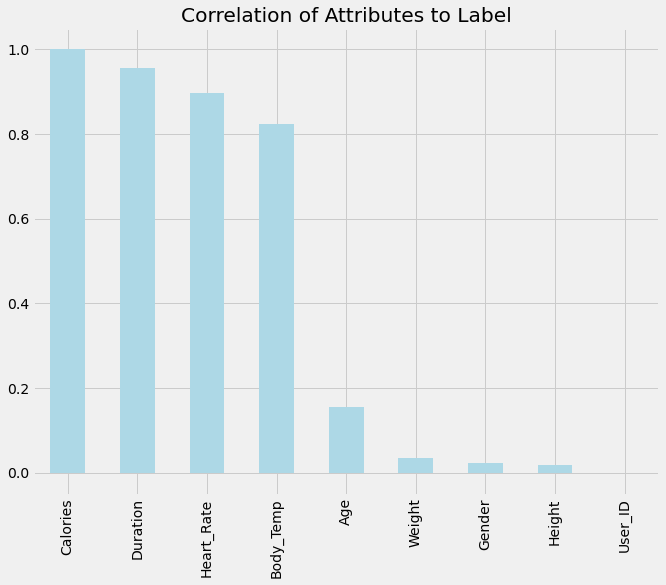

In [109]:
plt.style.use('fivethirtyeight')
corr_matrix["Calories"].sort_values(ascending= False).plot.bar(figsize=(10,8), color= "lightblue")

plt.title("Correlation of Attributes to Label")


plt.show()

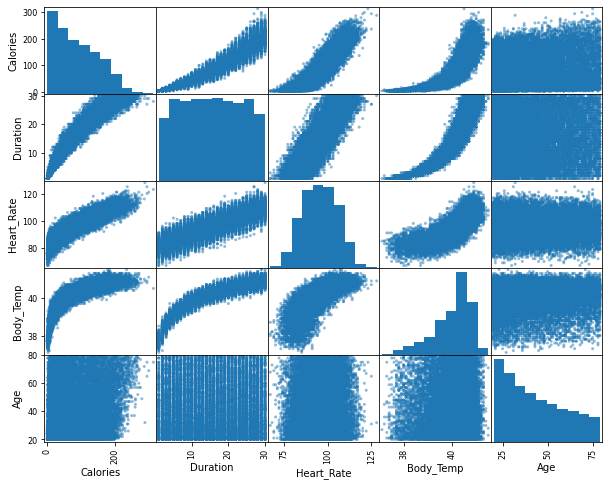

In [91]:
from pandas.plotting import scatter_matrix
attributes = ["Calories", "Duration", "Heart_Rate", "Body_Temp", "Age"] 
scatter_matrix(data[attributes],
              figsize=(10, 8))
plt.show()

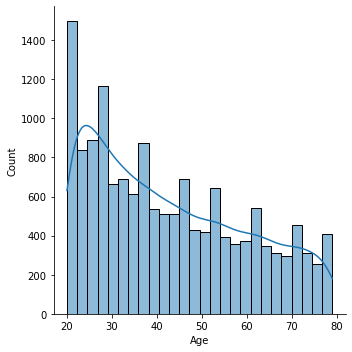

In [85]:
# View distribution of "Age" attribute

sns.displot(data["Age"], kde= True)

## Data Preprocessing

In [19]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [25]:
# Convert Gender to numerics

data["Gender"] = data["Gender"].apply(lambda x: 1 if x == "male" else 0)

In [26]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [28]:
data["Gender"].value_counts()

0    7553
1    7447
Name: Gender, dtype: int64

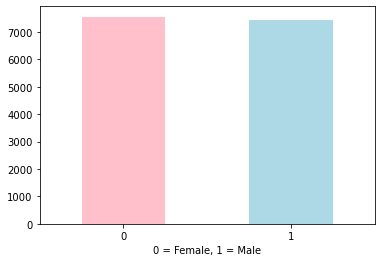

In [38]:
fig = data["Gender"].value_counts().plot.bar(color=["pink", "lightblue"])
plt.xlabel("0 = Female, 1 = Male")
plt.xticks(rotation=0)
plt.show()

In [ ]:
fig = df["target"].value_counts().plot.bar(color=["Red", "pink"])
plt.xlabel("1 = Disease, 0 = No Disease");

## Modeling

In [111]:
X = data.drop(["User_ID", "Calories"], axis= 1)
y= data["Calories"]

In [113]:
# Split train/ test

X_train, X_test, y_train, y_test= train_test_split(X, y , test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12000, 7), (3000, 7), (12000,), (3000,))

#### Standardize Data

In [116]:
scaler = StandardScaler()
#X = scaler.fit_transform(X)

### XGBoost Regressor

In [117]:
model_xgb = XGBRegressor()

In [119]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [120]:
# prediction
xgb_preds = model_xgb.predict(X_train)

In [147]:
from sklearn.metrics import mean_absolute_error
# Mean Absolute Error Training Set
mae = mean_absolute_error(y_train, xgb_preds)
mae

0.9420929123560587

In [ ]:
# Mean Absolute Error Testing Set

In [149]:
xgb_preds2 = model_xgb.predict(X_test)
mae = mean_absolute_error(y_test, xgb_preds2)
mae

1.5139621509313583